# Validation between ERA5 data with NCDC weather station data (daily averages)

Many researchers involved in SALURBAL are interested in using historical temperature reanalysis data. For that reason, we validated the product ERA5 hourly data on single levels from ECWF with NCDC weather station data across different Koeppen climate regions represented in SALURBAL cities. As a brief overview, from the 371 cities, 166 are categorized as tropical (group A), 79 as dry (group B), 125 as temperate (group C) and 1 as polar (group E). No continental climate zones (group D) are represented in SALURBAL cities.

In order to carry out the validation process, we examined daily average temperature data over 2 years, from January 1, 2018 to December 31, 2019. The data product for NCDC is “Global Summary of the Day” and captures a minimum of 4 observations per day. The data product for ERA5 is “t2m” and has an hourly, 30 km scale. In order to homologate these two data sources, we specify if the NCDC data is produced by a weather station in an airport, the mean of number of hourly observations per day, and the number of values captured in the 2 year period.

From the 371 cities, 17 cities were selected: 7 in tropical, 5 in dry, and 5 in temperate zones. From the 17 cities, 7 are coastal to have an idea of how correlated are pixels that can be impacted by the presence of water.

For data processing, please view the Jupyter notebook and the folder containing the temperature data in https://github.com/ifarah/salurbal_era5_ncdc. 

In [4]:
cd "salurbal_era5_ncdc/data18_19/"

/Users/irenefarah/salurbal_era5_ncdc/data18_19


In [5]:
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib

NCDC mean daily observations 23.67081604426003
LinregressResult(slope=1.2588125376804473, intercept=-0.744152992847539, rvalue=0.6911439872371676, pvalue=8.887097867678933e-104, stderr=0.04902224730043675)
(0.6911439872371677, 8.887097867677388e-104)
NCDC # observations 723
ERA5 # observations 730
range era5 3.3861267859151454
range ncdc 10.666666666666671


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

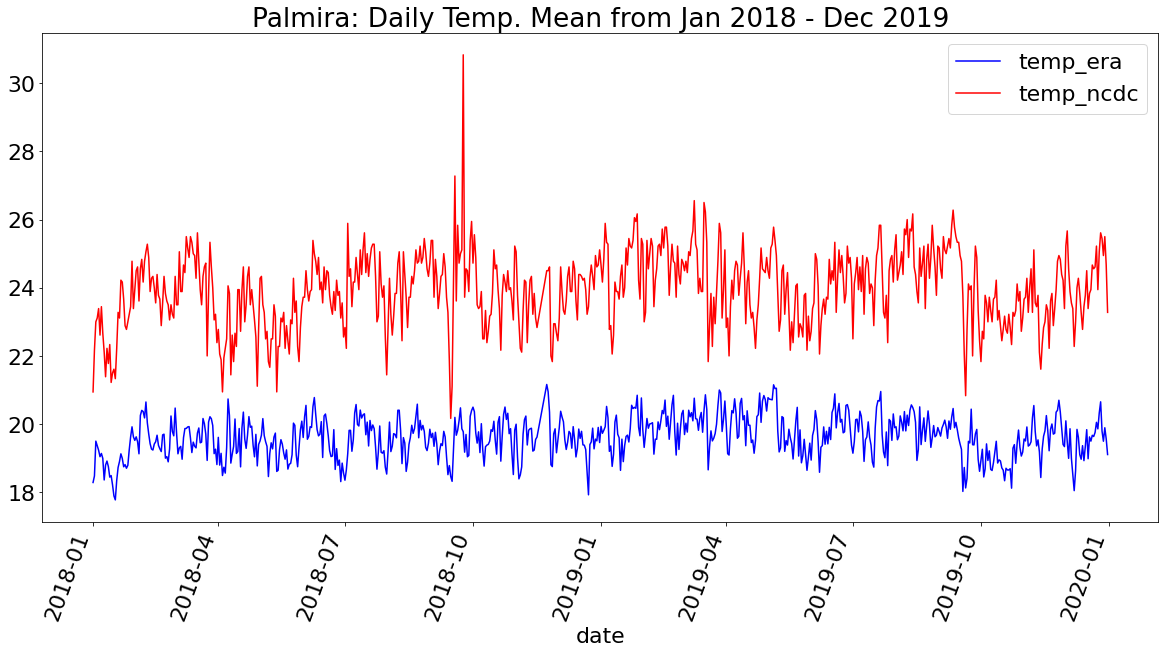

In [6]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Palmira.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Palmira_era=da.groupby(['year','month', 'day']).mean()

#NCDC
#Palmira:
pal=pd.read_csv("NCDC/NCDC_Palmira.csv")
#Select columns
Palmira= pal[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
Palmira['TEMP']=((Palmira['TEMP']) - 32) * (5/9)


# Create date in separate columns:
#make the new columns using string indexing
Palmira['col'] = Palmira['DATE'].astype(str)
Palmira['year'] = Palmira['col'].str[0:4]
Palmira['month'] = Palmira['col'].str[5:7]
Palmira['day'] = Palmira['col'].str[8:10]
# get rid of the extra variable (if you want)
Palmira.drop('col', axis=1, inplace=True)
Palmira.drop('DATE', axis=1, inplace=True)

print('NCDC mean daily observations', (Palmira["TEMP_ATTRIBUTES"].mean()))

####################################################################
#Merge ERA5 and NCDC
merged_pal = Palmira_era.merge(Palmira, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_pal["date"]=pd.to_datetime((merged_pal.year+merged_pal.month+merged_pal.day),format='%Y%m%d')
merged_pal=merged_pal.set_index('date')
column_1 = merged_pal["temp_era"]
column_2 = merged_pal["TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))
print('NCDC # observations', len(Palmira["TEMP"]))
print('ERA5 # observations', len(Palmira_era["temp_era"]))
print('range era5', merged_pal['temp_era'].max()-merged_pal['temp_era'].min())
print('range ncdc', merged_pal['TEMP'].max()-merged_pal['TEMP'].min())


matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_pal['temp_era'].plot(c='blue')
merged_pal['TEMP'].plot(c='red',)
plt.title('Palmira: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 12.814504881450489
LinregressResult(slope=0.8735809611848087, intercept=4.2730446910164055, rvalue=0.7561658315037509, pvalue=8.204395372487969e-134, stderr=0.028272429743750833)
(0.7561658315037506, 8.204395372485404e-134)
NCDC # observations 717
ERA5 # observations 730
range era5 7.1239937912140086
range ncdc 8.444444444444436


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

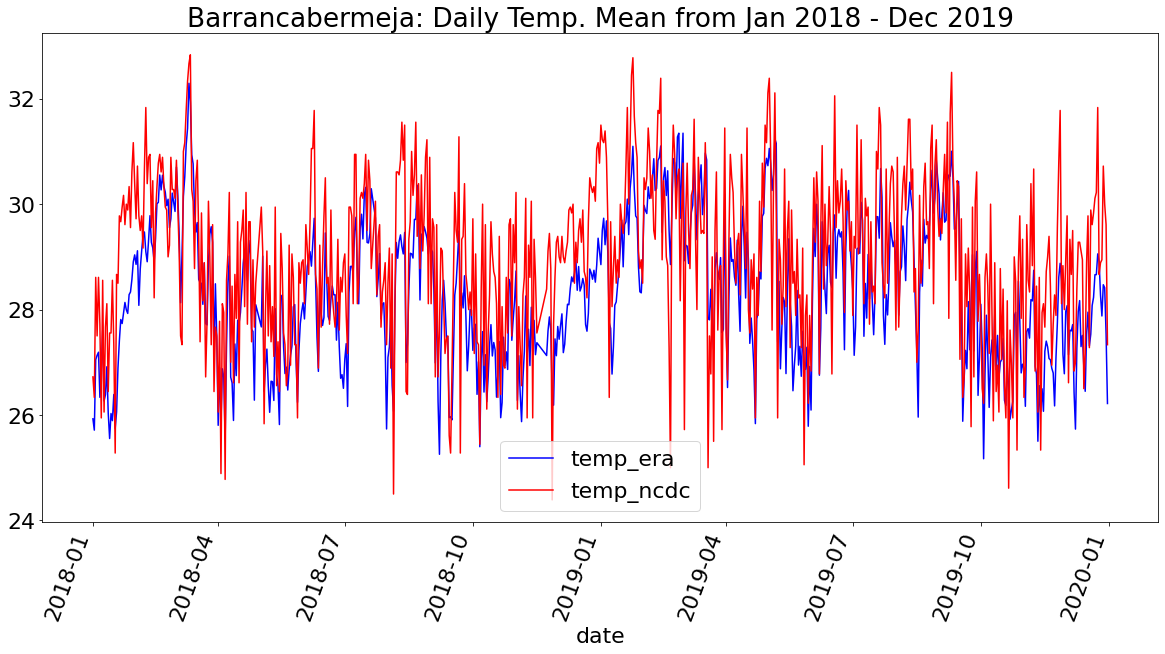

In [7]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Barrancabermeja.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Barrancabermeja_era=da.groupby(['year','month', 'day']).mean()

#NCDC
#Barrancabermeja:
bar=pd.read_csv("NCDC/NCDC_Barrancabermeja.csv")
#Select columns
Barrancabermeja= bar[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
Barrancabermeja['TEMP']=((Barrancabermeja['TEMP']) - 32) * (5/9)


# Create date in separate columns:
#make the new columns using string indexing
Barrancabermeja['col'] = Barrancabermeja['DATE'].astype(str)
Barrancabermeja['year'] = Barrancabermeja['col'].str[0:4]
Barrancabermeja['month'] = Barrancabermeja['col'].str[5:7]
Barrancabermeja['day'] = Barrancabermeja['col'].str[8:10]
# get rid of the extra variable (if you want)
Barrancabermeja.drop('col', axis=1, inplace=True)
Barrancabermeja.drop('DATE', axis=1, inplace=True)

print('NCDC mean daily observations', (Barrancabermeja["TEMP_ATTRIBUTES"].mean()))

####################################################################
#Merge ERA5 and NCDC
merged_bar = Barrancabermeja_era.merge(Barrancabermeja, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_bar["date"]=pd.to_datetime((merged_bar.year+merged_bar.month+merged_bar.day),format='%Y%m%d')
merged_bar=merged_bar.set_index('date')
column_1 = merged_bar["temp_era"]
column_2 = merged_bar["TEMP"]
correlation = column_1.corr(column_2)


print(linregress(column_1, column_2))

print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(Barrancabermeja["TEMP"]))
print('ERA5 # observations', len(Barrancabermeja_era["temp_era"]))

print('range era5', merged_bar['temp_era'].max()-merged_bar['temp_era'].min())
print('range ncdc', merged_bar['TEMP'].max()-merged_bar['TEMP'].min())


matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_bar['temp_era'].plot(c='blue')
merged_bar['TEMP'].plot(c='red',)
plt.title('Barrancabermeja: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 6.597222222222222
LinregressResult(slope=1.054716005529007, intercept=0.554338826511497, rvalue=0.9186028214001378, pvalue=1.025386950856176e-291, stderr=0.01693334491680457)
(0.918602821400138, 1.0253869508553288e-291)
NCDC # observations 720
ERA5 # observations 730
range era5 15.234036237481813
range ncdc 17.555555555555557


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

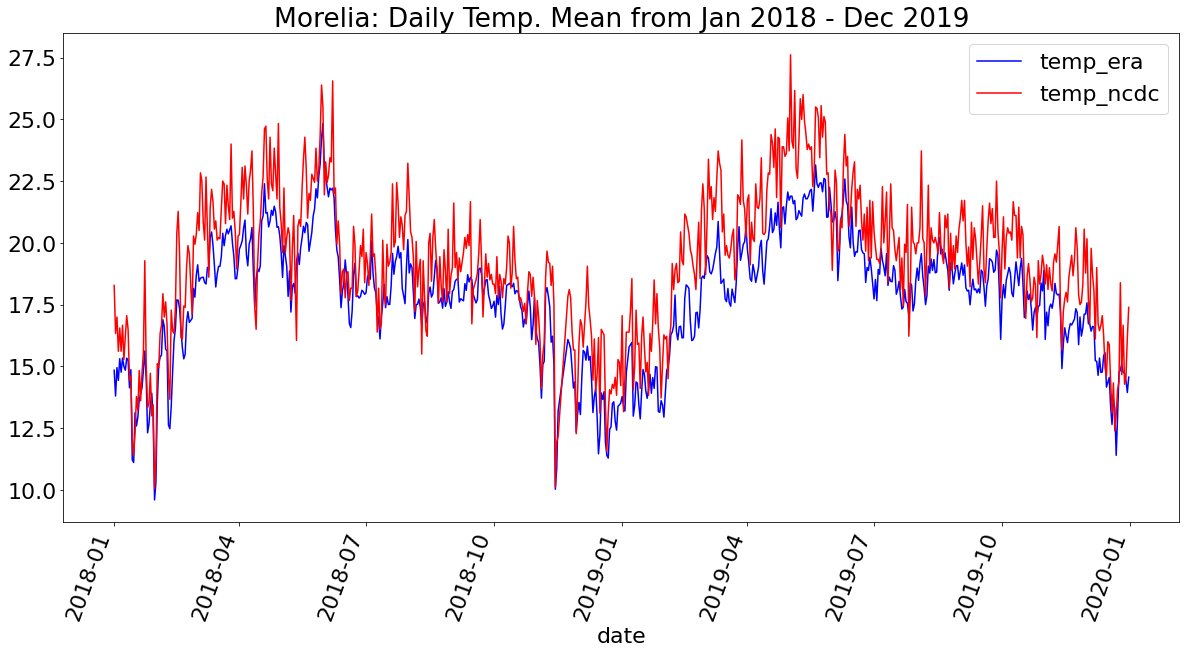

In [8]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Morelia.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Morelia_era=da.groupby(['year','month', 'day']).mean()

#NCDC
#Morelia:
mor=pd.read_csv("NCDC/NCDC_Morelia.csv")
#Select columns
Morelia= mor[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
Morelia['TEMP']=((Morelia['TEMP']) - 32) * (5/9)


# Create date in separate columns:
#make the new columns using string indexing
Morelia['col'] = Morelia['DATE'].astype(str)
Morelia['year'] = Morelia['col'].str[0:4]
Morelia['month'] = Morelia['col'].str[5:7]
Morelia['day'] = Morelia['col'].str[8:10]
# get rid of the extra variable (if you want)
Morelia.drop('col', axis=1, inplace=True)
Morelia.drop('DATE', axis=1, inplace=True)

print('NCDC mean daily observations', (Morelia["TEMP_ATTRIBUTES"].mean()))

####################################################################
#Merge ERA5 and NCDC
merged_mor = Morelia_era.merge(Morelia, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_mor["date"]=pd.to_datetime((merged_mor.year+merged_mor.month+merged_mor.day),format='%Y%m%d')
merged_mor=merged_mor.set_index('date')
column_1 = merged_mor["temp_era"]
column_2 = merged_mor["TEMP"]
correlation = column_1.corr(column_2)


print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(Morelia["TEMP"]))
print('ERA5 # observations', len(Morelia_era["temp_era"]))

print('range era5', merged_mor['temp_era'].max()-merged_mor['temp_era'].min())
print('range ncdc', merged_mor['TEMP'].max()-merged_mor['TEMP'].min())


matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_mor['temp_era'].plot(c='blue')
merged_mor['TEMP'].plot(c='red',)
plt.title('Morelia: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 20.521438450899034
LinregressResult(slope=0.9333706522286872, intercept=4.9688915540443865, rvalue=0.9208121974329775, pvalue=4.689919930376268e-297, stderr=0.014722685797447017)
(0.9208121974329778, 4.689919930370152e-297)
NCDC # observations 723
ERA5 # observations 730
range era5 13.472141192621146
range ncdc 15.166666666666668


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

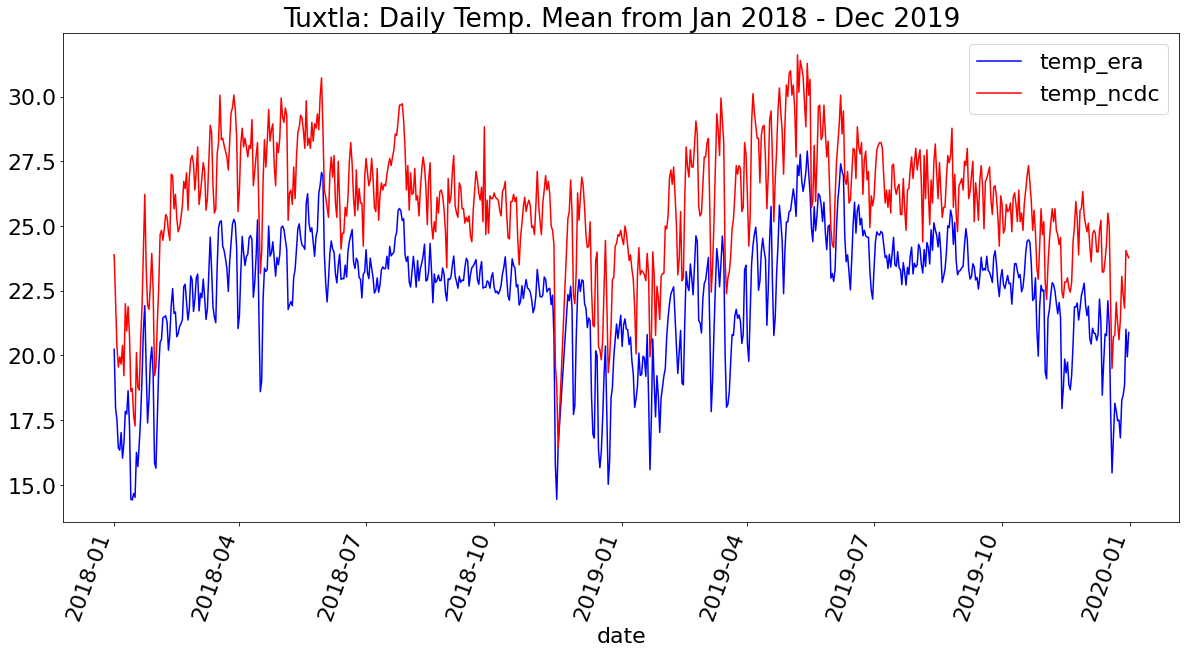

In [9]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Tuxtla.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Tuxtla_era=da.groupby(['year','month', 'day']).mean()

#NCDC
#Tuxtla:
tux=pd.read_csv("NCDC/NCDC_Tuxtla.csv")
#Select columns
Tuxtla= tux[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
Tuxtla['TEMP']=((Tuxtla['TEMP']) - 32) * (5/9)


# Create date in separate columns:
#make the new columns using string indexing
Tuxtla['col'] = Tuxtla['DATE'].astype(str)
Tuxtla['year'] = Tuxtla['col'].str[0:4]
Tuxtla['month'] = Tuxtla['col'].str[5:7]
Tuxtla['day'] = Tuxtla['col'].str[8:10]
# get rid of the extra variable (if you want)
Tuxtla.drop('col', axis=1, inplace=True)
Tuxtla.drop('DATE', axis=1, inplace=True)

print('NCDC mean daily observations', (Tuxtla["TEMP_ATTRIBUTES"].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_tux = Tuxtla_era.merge(Tuxtla, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_tux["date"]=pd.to_datetime((merged_tux.year+merged_tux.month+merged_tux.day),format='%Y%m%d')
merged_tux=merged_tux.set_index('date')
column_1 = merged_tux["temp_era"]
column_2 = merged_tux["TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))
print('NCDC # observations', len(Tuxtla["TEMP"]))
print('ERA5 # observations', len(Tuxtla_era["temp_era"]))
print('range era5', merged_tux['temp_era'].max()-merged_tux['temp_era'].min())
print('range ncdc', merged_tux['TEMP'].max()-merged_tux['TEMP'].min())

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_tux['temp_era'].plot(c='blue')
merged_tux['TEMP'].plot(c='red',)
plt.title('Tuxtla: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 23.74688796680498
LinregressResult(slope=0.8772208784228651, intercept=0.7138204433655471, rvalue=0.6911010384299229, pvalue=9.259348277425309e-104, stderr=0.034165893595178506)
(0.6911010384299228, 9.259348277426649e-104)
NCDC # observations 723
ERA5 # observations 730
range era5 4.603581464138003
range ncdc 6.611111111111109


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

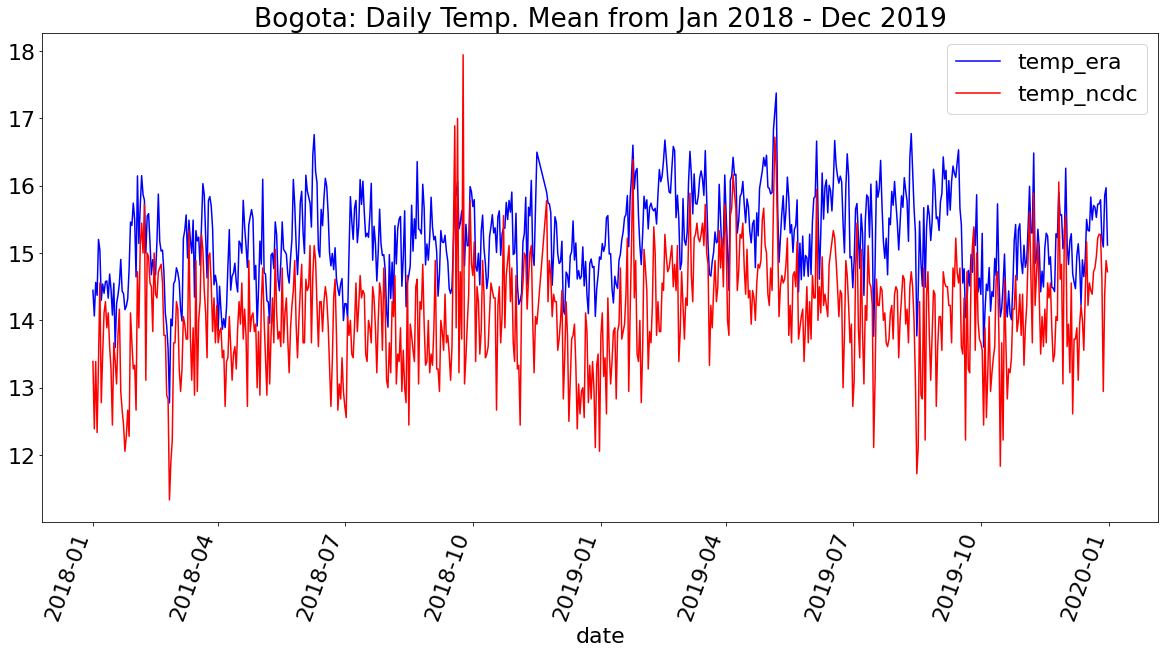

In [10]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Bogota.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Bogota_era=da.groupby(['year','month', 'day']).mean()

#NCDC
#Bogota:
bog=pd.read_csv("NCDC/NCDC_Bogota.csv")
#Select columns
Bogota= bog[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
Bogota['TEMP']=((Bogota['TEMP']) - 32) * (5/9)


# Create date in separate columns:
#make the new columns using string indexing
Bogota['col'] = Bogota['DATE'].astype(str)
Bogota['year'] = Bogota['col'].str[0:4]
Bogota['month'] = Bogota['col'].str[5:7]
Bogota['day'] = Bogota['col'].str[8:10]
# get rid of the extra variable (if you want)
Bogota.drop('col', axis=1, inplace=True)
Bogota.drop('DATE', axis=1, inplace=True)

print('NCDC mean daily observations', (Bogota["TEMP_ATTRIBUTES"].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_bog = Bogota_era.merge(Bogota, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_bog["date"]=pd.to_datetime((merged_bog.year+merged_bog.month+merged_bog.day),format='%Y%m%d')
merged_bog=merged_bog.set_index('date')
column_1 = merged_bog["temp_era"]
column_2 = merged_bog["TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))
print('NCDC # observations', len(Bogota["TEMP"]))
print('ERA5 # observations', len(Bogota_era["temp_era"]))
print('range era5', merged_bog['temp_era'].max()-merged_bog['temp_era'].min())
print('range ncdc', merged_bog['TEMP'].max()-merged_bog['TEMP'].min())

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_bog['temp_era'].plot(c='blue')
merged_bog['TEMP'].plot(c='red',)
plt.title('Bogota: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 7.249299719887955
LinregressResult(slope=1.149906275989543, intercept=-3.537356730915512, rvalue=0.790663505965818, pvalue=7.429689345905302e-154, stderr=0.03337030823094725)
(0.7906635059658179, 7.429689345903348e-154)
NCDC # observations 714
ERA5 # observations 730
range era5 5.321083923879723
range ncdc 8.333333333333332


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

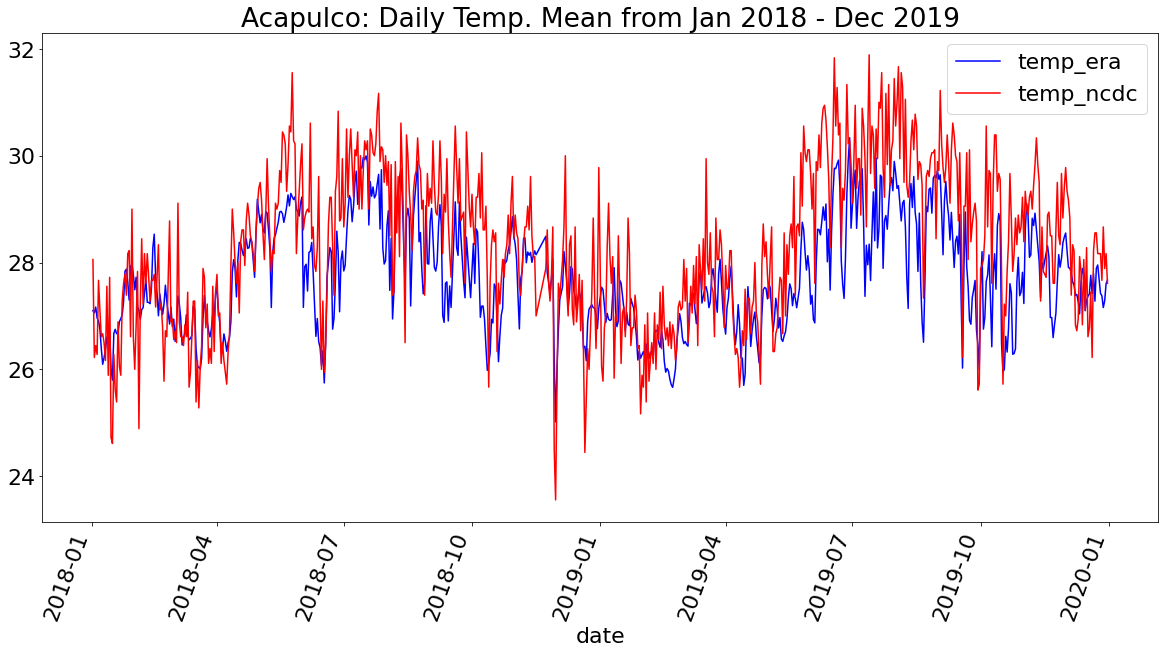

In [11]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Acapulco.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Acapulco_era=da.groupby(['year','month', 'day']).mean()

#NCDC
#Acapulco:
aca=pd.read_csv("NCDC/NCDC_Acapulco.csv")
#Select columns
Acapulco= aca[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
Acapulco['TEMP']=((Acapulco['TEMP']) - 32) * (5/9)


# Create date in separate columns:
#make the new columns using string indexing
Acapulco['col'] = Acapulco['DATE'].astype(str)
Acapulco['year'] = Acapulco['col'].str[0:4]
Acapulco['month'] = Acapulco['col'].str[5:7]
Acapulco['day'] = Acapulco['col'].str[8:10]
# get rid of the extra variable (if you want)
Acapulco.drop('col', axis=1, inplace=True)
Acapulco.drop('DATE', axis=1, inplace=True)

print('NCDC mean daily observations', (Acapulco["TEMP_ATTRIBUTES"].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_aca = Acapulco_era.merge(Acapulco, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_aca["date"]=pd.to_datetime((merged_aca.year+merged_aca.month+merged_aca.day),format='%Y%m%d')
merged_aca=merged_aca.set_index('date')
column_1 = merged_aca["temp_era"]
column_2 = merged_aca["TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))
print('NCDC # observations', len(Acapulco["TEMP"]))
print('ERA5 # observations', len(Acapulco_era["temp_era"]))
print('range era5', merged_aca['temp_era'].max()-merged_aca['temp_era'].min())
print('range ncdc', merged_aca['TEMP'].max()-merged_aca['TEMP'].min())

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_aca['temp_era'].plot(c='blue')
merged_aca['TEMP'].plot(c='red',)
plt.title('Acapulco: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 23.533886583679116
LinregressResult(slope=1.018789031308296, intercept=-0.2696007713070543, rvalue=0.9714558023870846, pvalue=0.0, stderr=0.009265012803615245)
(0.9714558023870845, 0.0)
NCDC # observations 723
ERA5 # observations 730
range era5 10.390678336025756
range ncdc 11.333333333333332


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

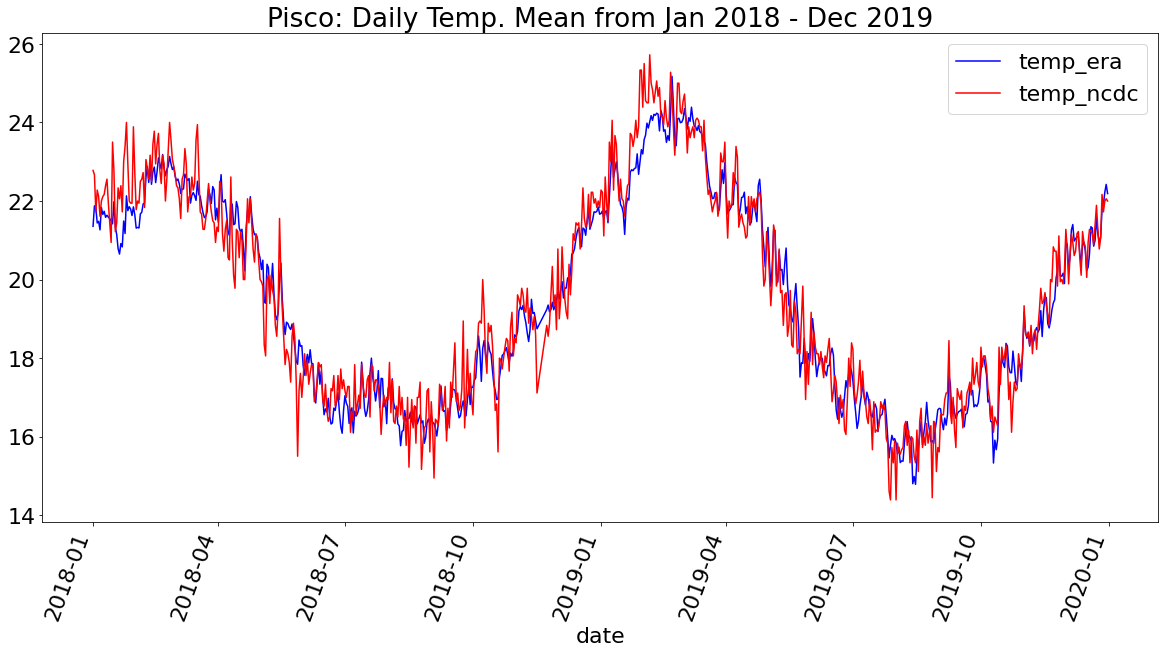

In [12]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Pisco.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Pisco_era=da.groupby(['year','month', 'day']).mean()

#NCDC
#Pisco:
pis=pd.read_csv("NCDC/NCDC_Pisco.csv")
#Select columns
Pisco= pis[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
Pisco['TEMP']=((Pisco['TEMP']) - 32) * (5/9)


# Create date in separate columns:
#make the new columns using string indexing
Pisco['col'] = Pisco['DATE'].astype(str)
Pisco['year'] = Pisco['col'].str[0:4]
Pisco['month'] = Pisco['col'].str[5:7]
Pisco['day'] = Pisco['col'].str[8:10]
# get rid of the extra variable (if you want)
Pisco.drop('col', axis=1, inplace=True)
Pisco.drop('DATE', axis=1, inplace=True)

print('NCDC mean daily observations', (Pisco["TEMP_ATTRIBUTES"].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_pis = Pisco_era.merge(Pisco, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_pis["date"]=pd.to_datetime((merged_pis.year+merged_pis.month+merged_pis.day),format='%Y%m%d')
merged_pis=merged_pis.set_index('date')
column_1 = merged_pis["temp_era"]
column_2 = merged_pis["TEMP"]
correlation = column_1.corr(column_2)


print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(Pisco["TEMP"]))
print('ERA5 # observations', len(Pisco_era["temp_era"]))

print('range era5', merged_pis['temp_era'].max()-merged_pis['temp_era'].min())
print('range ncdc', merged_pis['TEMP'].max()-merged_pis['TEMP'].min())


matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_pis['temp_era'].plot(c='blue')
merged_pis['TEMP'].plot(c='red',)
plt.title('Pisco: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 9.267782426778243
LinregressResult(slope=1.2124885124702067, intercept=-0.3255948066947436, rvalue=0.9531904614287812, pvalue=0.0, stderr=0.014384156561427951)
(0.9531904614287813, 0.0)
NCDC # observations 717
ERA5 # observations 730
range era5 23.203357565618187
range ncdc 29.944444444444443


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

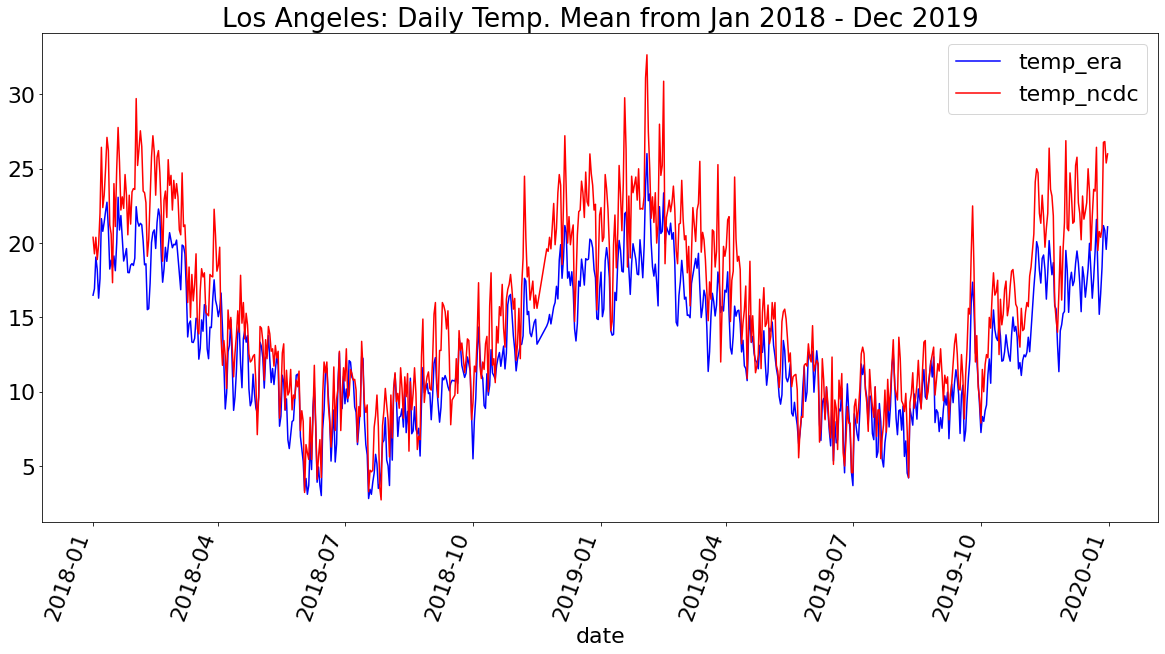

In [13]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_LA.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
LosAngeles_era=da.groupby(['year','month', 'day']).mean()

#NCDC
#LosAngeles:
la=pd.read_csv("NCDC/NCDC_LA.csv")
#Select columns
LosAngeles= la[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
LosAngeles['TEMP']=((LosAngeles['TEMP']) - 32) * (5/9)


# Create date in separate columns:
#make the new columns using string indexing
LosAngeles['col'] = LosAngeles['DATE'].astype(str)
LosAngeles['year'] = LosAngeles['col'].str[0:4]
LosAngeles['month'] = LosAngeles['col'].str[5:7]
LosAngeles['day'] = LosAngeles['col'].str[8:10]
# get rid of the extra variable (if you want)
LosAngeles.drop('col', axis=1, inplace=True)
LosAngeles.drop('DATE', axis=1, inplace=True)

print('NCDC mean daily observations', (LosAngeles["TEMP_ATTRIBUTES"].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_la = LosAngeles_era.merge(LosAngeles, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_la["date"]=pd.to_datetime((merged_la.year+merged_la.month+merged_la.day),format='%Y%m%d')
merged_la=merged_la.set_index('date')
column_1 = merged_la["temp_era"]
column_2 = merged_la["TEMP"]
correlation = column_1.corr(column_2)


print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(LosAngeles["TEMP"]))
print('ERA5 # observations', len(LosAngeles_era["temp_era"]))

print('range era5', merged_la['temp_era'].max()-merged_la['temp_era'].min())
print('range ncdc', merged_la['TEMP'].max()-merged_la['TEMP'].min())


matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_la['temp_era'].plot(c='blue')
merged_la['TEMP'].plot(c='red',)
plt.title('Los Angeles: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 23.597510373443985
LinregressResult(slope=1.349584971916986, intercept=1.6922449481224398, rvalue=0.9470770858728376, pvalue=0.0, stderr=0.017035728888737688)
(0.9470770858728373, 0.0)
NCDC # observations 723
ERA5 # observations 730
range era5 19.55121555754954
range ncdc 25.055555555555557


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

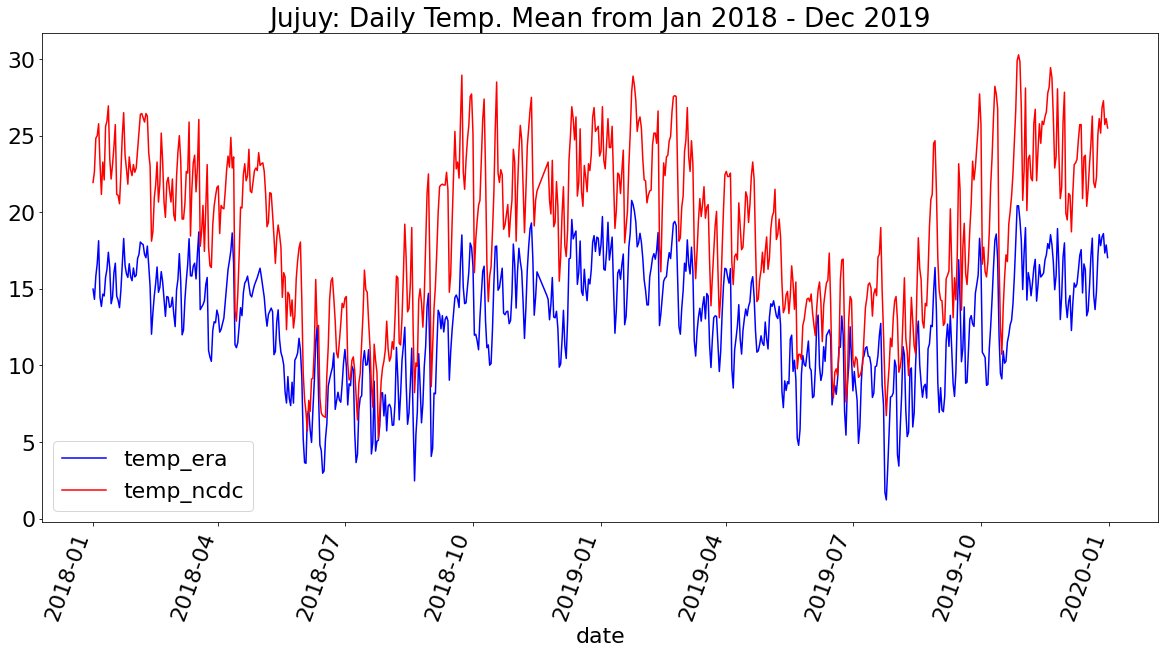

In [14]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Jujuy.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Jujuy_era=da.groupby(['year','month', 'day']).mean()

#NCDC
#Jujuy:
juy=pd.read_csv("NCDC/NCDC_Jujuy.csv")
#Select columns
Jujuy= juy[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
Jujuy['TEMP']=((Jujuy['TEMP']) - 32) * (5/9)


# Create date in separate columns:
#make the new columns using string indexing
Jujuy['col'] = Jujuy['DATE'].astype(str)
Jujuy['year'] = Jujuy['col'].str[0:4]
Jujuy['month'] = Jujuy['col'].str[5:7]
Jujuy['day'] = Jujuy['col'].str[8:10]
# get rid of the extra variable (if you want)
Jujuy.drop('col', axis=1, inplace=True)
Jujuy.drop('DATE', axis=1, inplace=True)

print('NCDC mean daily observations', (Jujuy["TEMP_ATTRIBUTES"].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_juy = Jujuy_era.merge(Jujuy, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_juy["date"]=pd.to_datetime((merged_juy.year+merged_juy.month+merged_juy.day),format='%Y%m%d')
merged_juy=merged_juy.set_index('date')
column_1 = merged_juy["temp_era"]
column_2 = merged_juy["TEMP"]
correlation = column_1.corr(column_2)


print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(Jujuy["TEMP"]))
print('ERA5 # observations', len(Jujuy_era["temp_era"]))

print('range era5', merged_juy['temp_era'].max()-merged_juy['temp_era'].min())
print('range ncdc', merged_juy['TEMP'].max()-merged_juy['TEMP'].min())


matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_juy['temp_era'].plot(c='blue')
merged_juy['TEMP'].plot(c='red',)
plt.title('Jujuy: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

LinregressResult(slope=1.1287350584573572, intercept=-1.0243588154862806, rvalue=0.9675822122809206, pvalue=0.0, stderr=0.011450732644785208)
(0.9675822122809205, 0.0)
NCDC # observations 664
ERA5 # observations 730
range era5 29.581939534431932
range ncdc 36.66666666666667


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

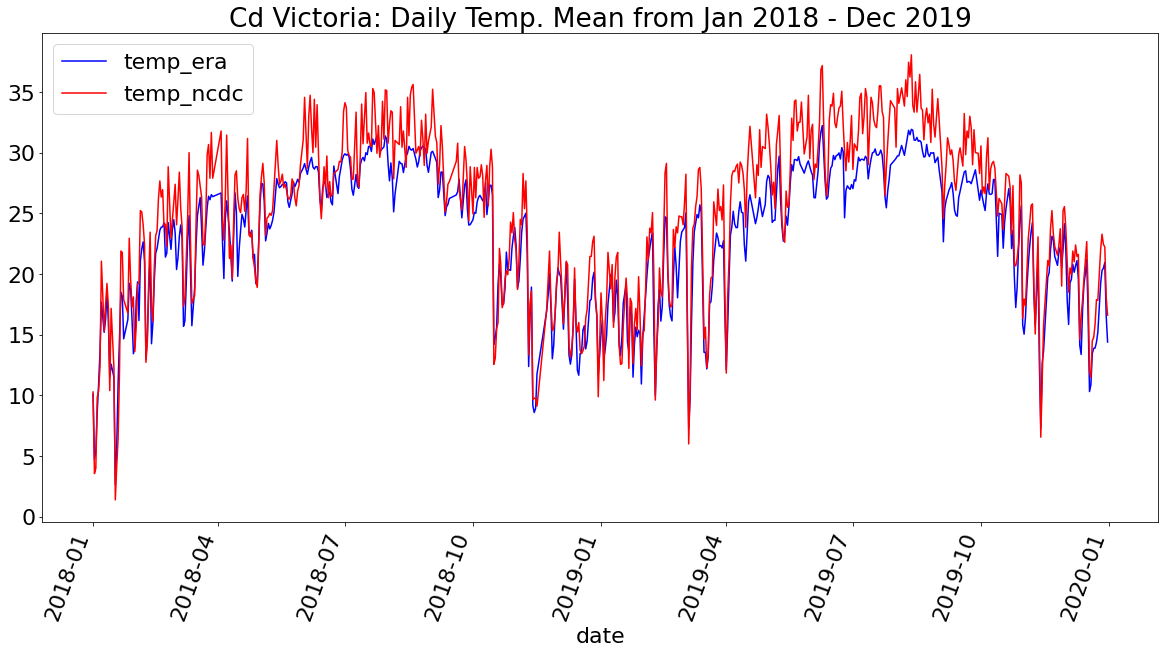

In [15]:
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Victoria.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Victoria_era=da.groupby(['year','month', 'day']).mean()
Victoria_era

#NCDC
#VCd ictoria:
#vic=pd.read_csv("https://www1.ncdc.noaa.gov/pub/orders/CDO96238200941.txt")
vic=pd.read_csv("NCDC/NCDC_Victoria.csv")
#Select columns
Victoria= vic[['DATE','TEMP','TEMP_ATTRIBUTES']]
#From Fahrenheit to Celsius
Victoria['TEMP']=((Victoria['TEMP']) - 32) * (5/9)


Victoria['col'] = Victoria['DATE'].astype(str)

# make the new columns using string indexing
Victoria['year'] = Victoria['col'].str[0:4]
Victoria['month'] = Victoria['col'].str[5:7]
Victoria['day'] = Victoria['col'].str[8:10]

# get rid of the extra variable (if you want)
Victoria.drop('col', axis=1, inplace=True)
Victoria.drop('DATE', axis=1, inplace=True)


####################################################################
#Merge ERA5 and NCDC
merged_vic = Victoria_era.merge(Victoria, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_vic["date"]=pd.to_datetime((merged_vic.year+merged_vic.month+merged_vic.day),format='%Y%m%d')
merged_vic=merged_vic.set_index('date')
column_1 = merged_vic["temp_era"]
column_2 = merged_vic["TEMP"]
correlation = column_1.corr(column_2)


print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(Victoria["TEMP"]))
print('ERA5 # observations', len(Victoria_era["temp_era"]))

print('range era5', merged_vic['temp_era'].max()-merged_vic['temp_era'].min())
print('range ncdc', merged_vic['TEMP'].max()-merged_vic['TEMP'].min())


matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_vic['temp_era'].plot(c='blue')
merged_vic['TEMP'].plot(c='red',)
plt.title('Cd Victoria: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

NCDC mean daily observations 14.800554016620499
LinregressResult(slope=0.9968990156358063, intercept=1.1864557074084487, rvalue=0.9940537075448519, pvalue=0.0, stderr=0.004069739653918036)
(0.9940537075448523, 0.0)
NCDC # observations 722
ERA5 # observations 730
range era5 26.175331432115183
range ncdc 26.44444444444445


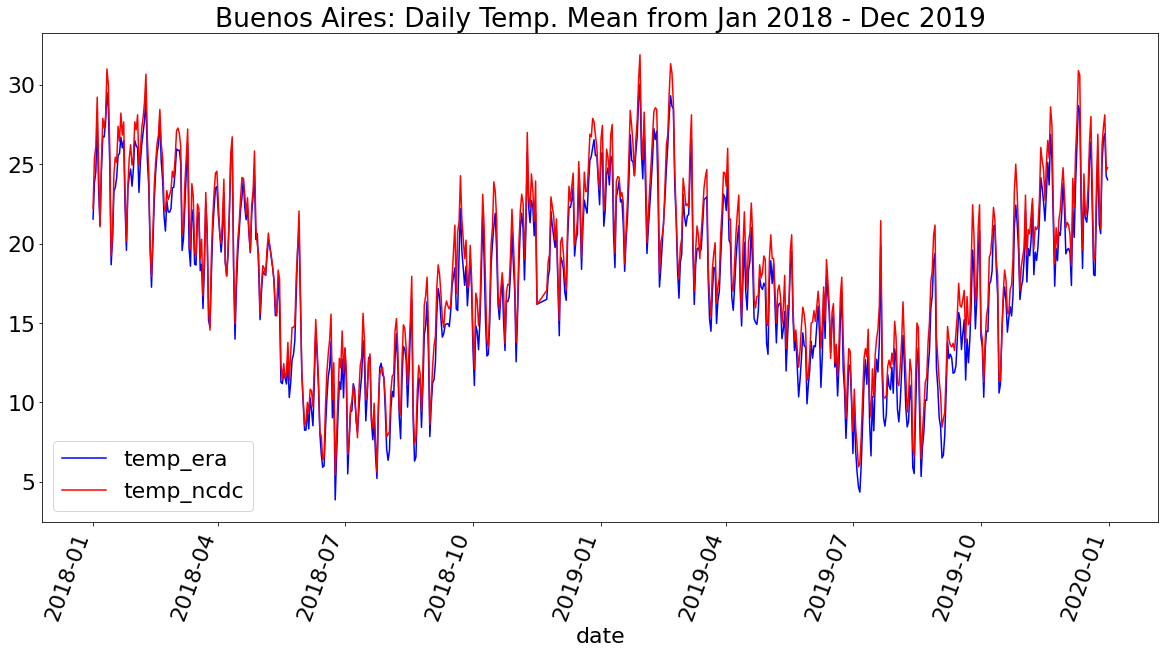

In [16]:
# Get ERA5

data=netCDF4.Dataset("ERA5/ERA5_2018_2019_BuenosAires.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
BuenosAires_era=da.groupby(['year','month', 'day']).mean()

#####################################################################
# Get NCDC
# make string version of original column, call it 'col'

#Read in Buenos Aires
ba=pd.read_csv("NCDC/NCDC_BuenosAires.csv")
#Select columns
BuenosAires= ba[[' YEARMODA','   TEMP','  ']]
#From Fahrenheit to Celsius
BuenosAires['   TEMP']=((BuenosAires['   TEMP']) - 32) * (5/9)



BuenosAires['col'] = BuenosAires[' YEARMODA'].astype(str)

# make the new columns using string indexing
BuenosAires['year'] = BuenosAires['col'].str[0:4]
BuenosAires['month'] = BuenosAires['col'].str[4:6]
BuenosAires['day'] = BuenosAires['col'].str[6:8]

# get rid of the extra variable (if you want)
BuenosAires.drop('col', axis=1, inplace=True)
BuenosAires.drop(' YEARMODA', axis=1, inplace=True)


print('NCDC mean daily observations', (BuenosAires['  '].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_ba = BuenosAires_era.merge(BuenosAires, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_ba["date"]=pd.to_datetime((merged_ba.year+merged_ba.month+merged_ba.day),format='%Y%m%d')
merged_ba=merged_ba.set_index('date')
column_1 = merged_ba["temp_era"]
column_2 = merged_ba["   TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(BuenosAires["   TEMP"]))
print('ERA5 # observations', len(BuenosAires_era["temp_era"]))

print('range era5', merged_ba['temp_era'].max()-merged_ba['temp_era'].min())
print('range ncdc', merged_ba['   TEMP'].max()-merged_ba['   TEMP'].min())


matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_ba['temp_era'].plot(c='blue')
merged_ba['   TEMP'].plot(c='red',)
plt.title('Buenos Aires: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

NCDC mean daily observations 22.408510638297873
LinregressResult(slope=1.1686599368729245, intercept=-4.5291178324227666, rvalue=0.9043471395132805, pvalue=3.697684101787368e-262, stderr=0.020801629861364444)
(0.9043471395132795, 3.6976841017974455e-262)
NCDC # observations 705
ERA5 # observations 730
range era5 5.5208025891230115
range ncdc 7.611111111111114


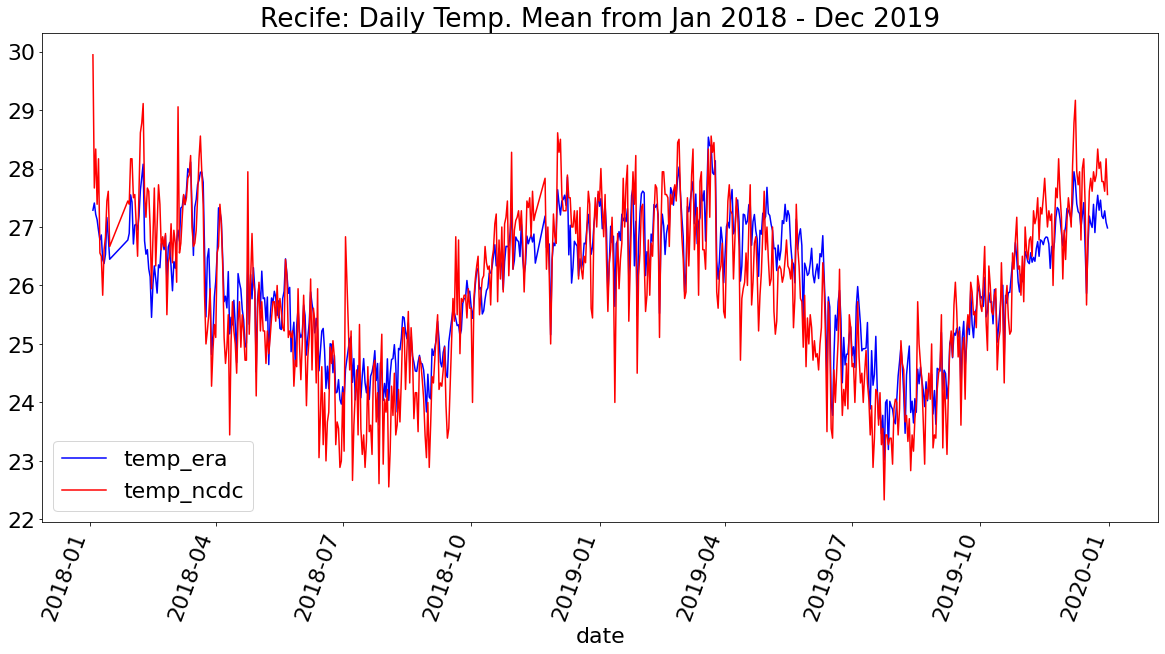

In [17]:
#Read in Recife
# Get ERA5
data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Recife.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Recife_era=da.groupby(['year','month', 'day']).mean()
Recife_era

#####################################################################
# Get NCDC
# make string version of original column, call it 'col'
rec=pd.read_csv("NCDC/NCDC_Recife.csv")
#Select columns
Recife= rec[[' YEARMODA','   TEMP','  ']]
#From Fahrenheit to Celsius
Recife['   TEMP']=((Recife['   TEMP']) - 32) * (5/9)


Recife['col'] = Recife[' YEARMODA'].astype(str)

# make the new columns using string indexing
Recife['year'] = Recife['col'].str[0:4]
Recife['month'] = Recife['col'].str[4:6]
Recife['day'] = Recife['col'].str[6:8]

# get rid of the extra variable (if you want)
Recife.drop('col', axis=1, inplace=True)
Recife.drop(' YEARMODA', axis=1, inplace=True)

print('NCDC mean daily observations', (Recife['  '].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_rec = Recife_era.merge(Recife, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_rec["date"]=pd.to_datetime((merged_rec.year+merged_rec.month+merged_rec.day),format='%Y%m%d')
merged_rec=merged_rec.set_index('date')
column_1 = merged_rec["temp_era"]
column_2 = merged_rec["   TEMP"]
correlation = column_1.corr(column_2)


print(linregress(column_1, column_2))

print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(Recife["   TEMP"]))
print('ERA5 # observations', len(Recife_era["temp_era"]))

print('range era5', merged_rec['temp_era'].max()-merged_rec['temp_era'].min())
print('range ncdc', merged_rec['   TEMP'].max()-merged_rec['   TEMP'].min())

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_rec['temp_era'].plot(c='blue')
merged_rec['   TEMP'].plot(c='red',)
plt.title('Recife: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 23.586919104991395
LinregressResult(slope=1.2148271609230017, intercept=-2.307068118445372, rvalue=0.9787041308373884, pvalue=0.0, stderr=0.010589169624838711)
(0.9787041308373884, 0.0)
NCDC # observations 581
ERA5 # observations 730
range era5 9.041770743779468
range ncdc 11.555555555555559


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

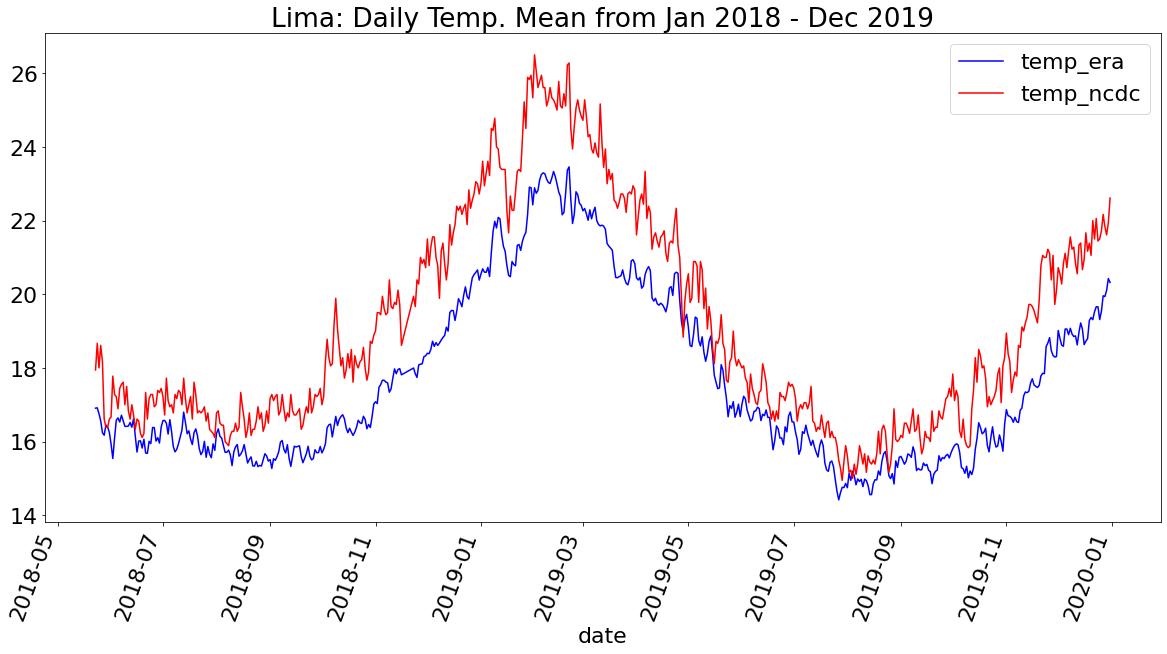

In [18]:
#Read in Lima
# Get ERA5

data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Lima.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Lima_era=da.groupby(['year','month', 'day']).mean()
Lima_era

#####################################################################
# Get NCDC
# make string version of original column, call it 'col'
li=pd.read_csv("NCDC/NCDC_Lima.csv")
#Select columns
Lima= li[[' YEARMODA','   TEMP','  ']]
#From Fahrenheit to Celsius
Lima['   TEMP']=((Lima['   TEMP']) - 32) * (5/9)


Lima['col'] = Lima[' YEARMODA'].astype(str)

# make the new columns using string indexing
Lima['year'] = Lima['col'].str[0:4]
Lima['month'] = Lima['col'].str[4:6]
Lima['day'] = Lima['col'].str[6:8]

# get rid of the extra variable (if you want)
Lima.drop('col', axis=1, inplace=True)
Lima.drop(' YEARMODA', axis=1, inplace=True)


print('NCDC mean daily observations', (Lima['  '].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_lim = Lima_era.merge(Lima, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_lim["date"]=pd.to_datetime((merged_lim.year+merged_lim.month+merged_lim.day),format='%Y%m%d')
merged_lim=merged_lim.set_index('date')
column_1 = merged_lim["temp_era"]
column_2 = merged_lim["   TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(Lima["   TEMP"]))
print('ERA5 # observations', len(Lima_era["temp_era"]))
print('range era5', merged_lim['temp_era'].max()-merged_lim['temp_era'].min())
print('range ncdc', merged_lim['   TEMP'].max()-merged_lim['   TEMP'].min())

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_lim['temp_era'].plot(c='blue')
merged_lim['   TEMP'].plot(c='red',)
plt.title('Lima: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 23.764868603042878
LinregressResult(slope=0.9854636342327336, intercept=0.4149129409273975, rvalue=0.9954111956267543, pvalue=0.0, stderr=0.0035280637432978097)
(0.9954111956267543, 0.0)
NCDC # observations 723
ERA5 # observations 730
range era5 24.463461531072706
range ncdc 24.111111111111114


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

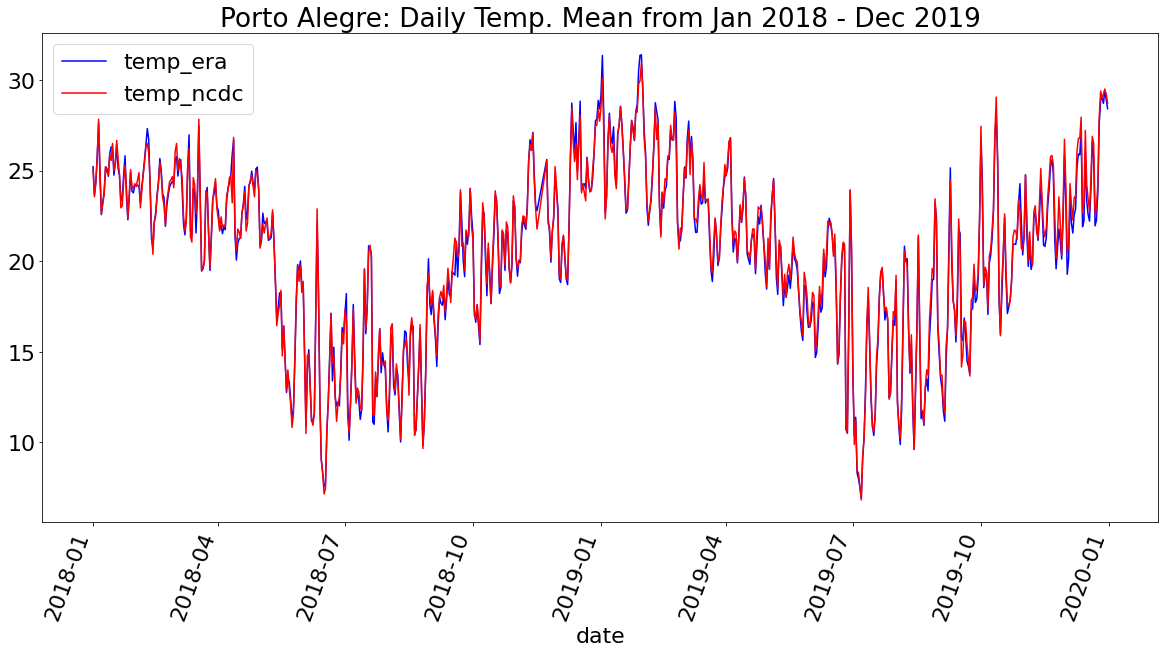

In [19]:
#Read in Salgado Filho - Porto Alegre


# Get ERA5

data=netCDF4.Dataset("ERA5/ERA5_2018_2019_PortoAlegre.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
PortoAlegre_era=da.groupby(['year','month', 'day']).mean()
PortoAlegre_era

#####################################################################
# Get NCDC
# make string version of original column, call it 'col'
pa=pd.read_csv("NCDC/NCDC_PortoAlegre.csv")
#Select columns
PortoAlegre= pa[[' YEARMODA','   TEMP','  ']]
#From Fahrenheit to Celsius
PortoAlegre['   TEMP']=((PortoAlegre['   TEMP']) - 32) * (5/9)

PortoAlegre['col'] = PortoAlegre[' YEARMODA'].astype(str)

# make the new columns using string indexing
PortoAlegre['year'] = PortoAlegre['col'].str[0:4]
PortoAlegre['month'] = PortoAlegre['col'].str[4:6]
PortoAlegre['day'] = PortoAlegre['col'].str[6:8]

# get rid of the extra variable (if you want)
PortoAlegre.drop('col', axis=1, inplace=True)
PortoAlegre.drop(' YEARMODA', axis=1, inplace=True)


print('NCDC mean daily observations', (PortoAlegre['  '].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_pa = PortoAlegre_era.merge(PortoAlegre, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_pa["date"]=pd.to_datetime((merged_pa.year+merged_pa.month+merged_pa.day),format='%Y%m%d')
merged_pa=merged_pa.set_index('date')
column_1 = merged_pa["temp_era"]
column_2 = merged_pa["   TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))


print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(PortoAlegre["   TEMP"]))
print('ERA5 # observations', len(PortoAlegre_era["temp_era"]))

print('range era5', merged_pa['temp_era'].max()-merged_pa['temp_era'].min())
print('range ncdc', merged_pa['   TEMP'].max()-merged_pa['   TEMP'].min())


matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_pa['temp_era'].plot(c='blue')
merged_pa['   TEMP'].plot(c='red',)
plt.title('Porto Alegre: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])



NCDC mean daily observations 23.369294605809127
LinregressResult(slope=0.8668786633023476, intercept=0.489449173948584, rvalue=0.9005531813264815, pvalue=4.8522105483798726e-263, stderr=0.01558535780233958)
(0.9005531813264819, 4.852210548374562e-263)
NCDC # observations 723
ERA5 # observations 730
range era5 11.993996096416263
range ncdc 11.499999999999998


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

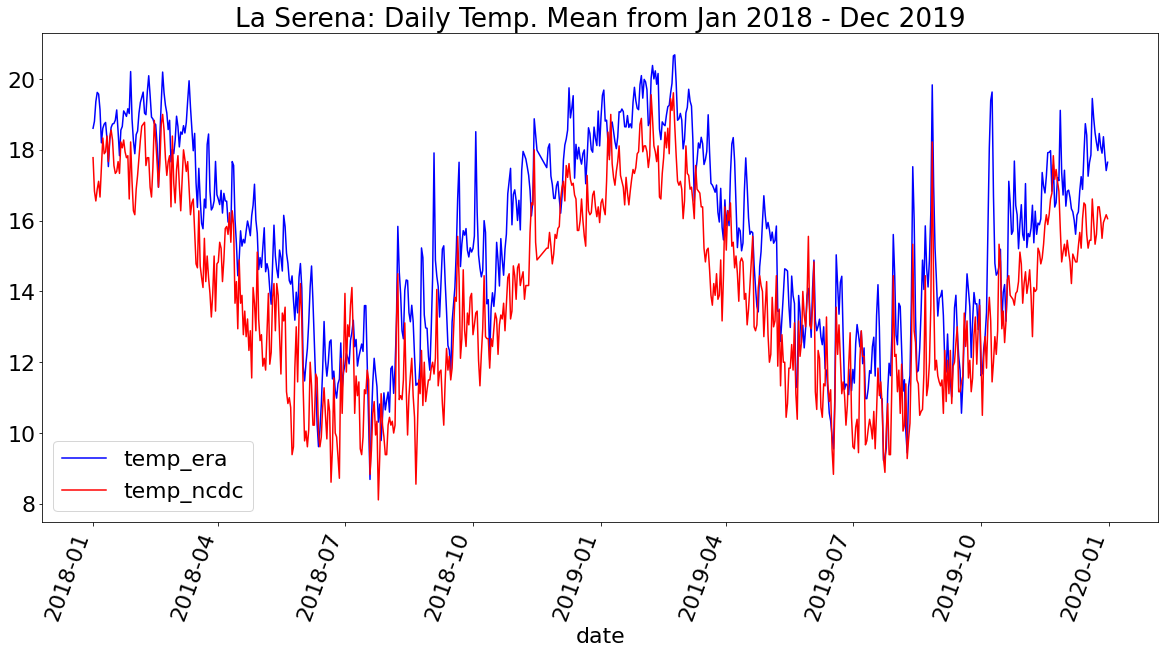

In [20]:
#Read in LaSerena
# Get ERA5

data=netCDF4.Dataset("ERA5/ERA5_2018_2019_LaSerena.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)
    
neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
LaSerena_era=da.groupby(['year','month', 'day']).mean()
LaSerena_era

#####################################################################
# Get NCDC
# make string version of original column, call it 'col'
las=pd.read_csv("NCDC/NCDC_LaSerena.csv")
#Select columns
LaSerena= las[[' YEARMODA','   TEMP','  ']]
#From Fahrenheit to Celsius
LaSerena['   TEMP']=((LaSerena['   TEMP']) - 32) * (5/9)


LaSerena['col'] = LaSerena[' YEARMODA'].astype(str)

# make the new columns using string indexing
LaSerena['year'] = LaSerena['col'].str[0:4]
LaSerena['month'] = LaSerena['col'].str[4:6]
LaSerena['day'] = LaSerena['col'].str[6:8]

# get rid of the extra variable (if you want)
LaSerena.drop('col', axis=1, inplace=True)
LaSerena.drop(' YEARMODA', axis=1, inplace=True)


print('NCDC mean daily observations', (LaSerena['  '].mean()))
####################################################################
#Merge ERA5 and NCDC

merged_las = LaSerena_era.merge(LaSerena, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_las["date"]=pd.to_datetime((merged_las.year+merged_las.month+merged_las.day),format='%Y%m%d')
merged_las=merged_las.set_index('date')
column_1 = merged_las["temp_era"]
column_2 = merged_las["   TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))

print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(LaSerena["   TEMP"]))
print('ERA5 # observations', len(LaSerena_era["temp_era"]))

print('range era5', merged_las['temp_era'].max()-merged_las['temp_era'].min())
print('range ncdc', merged_las['   TEMP'].max()-merged_las['   TEMP'].min())

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_las['temp_era'].plot(c='blue')
merged_las['   TEMP'].plot(c='red',)
plt.title('La Serena: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 14.6417704011065
LinregressResult(slope=0.9462947720066053, intercept=2.199181684777191, rvalue=0.9614736361149774, pvalue=0.0, stderr=0.010076081622098183)
(0.9614736361149773, 0.0)
NCDC # observations 723
ERA5 # observations 730
range era5 12.590668551661686
range ncdc 15.0


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

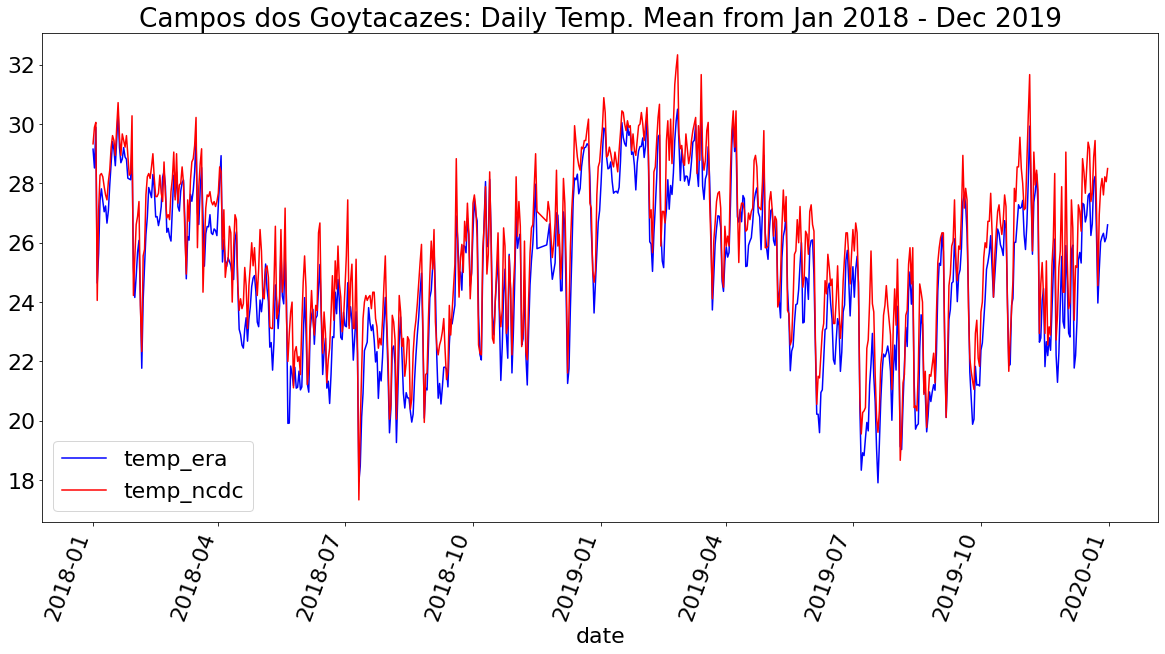

In [21]:
# Get ERA5

data=netCDF4.Dataset("ERA5/ERA5_2018_2019_Campos.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
Campos_era=da.groupby(['year','month', 'day']).mean()
Campos_era

#####################################################################
# Get NCDC
# make string version of original column, call it 'col'


#Aeropuerto AEROPORTO BARTHOLOMEU LYSANDRO, campos dos Goytacazes
goyta=pd.read_csv("NCDC/NCDC_Campos.csv")
#Select columns
Campos= goyta[[' YEARMODA','   TEMP','  ']]
#From Fahrenheit to Celsius
Campos['   TEMP']=((Campos['   TEMP']) - 32) * (5/9)


Campos['col'] = Campos[' YEARMODA'].astype(str)

# make the new columns using string indexing
Campos['year'] = Campos['col'].str[0:4]
Campos['month'] = Campos['col'].str[4:6]
Campos['day'] = Campos['col'].str[6:8]

# get rid of the extra variable (if you want)
Campos.drop('col', axis=1, inplace=True)
Campos.drop(' YEARMODA', axis=1, inplace=True)

print('NCDC mean daily observations', (Campos['  '].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_cam = Campos_era.merge(Campos, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_cam["date"]=pd.to_datetime((merged_cam.year+merged_cam.month+merged_cam.day),format='%Y%m%d')
merged_cam=merged_cam.set_index('date')
column_1 = merged_cam["temp_era"]
column_2 = merged_cam["   TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(Campos["   TEMP"]))
print('ERA5 # observations', len(Campos_era["temp_era"]))

print('range era5', merged_cam['temp_era'].max()-merged_cam['temp_era'].min())
print('range ncdc', merged_cam['   TEMP'].max()-merged_cam['   TEMP'].min())

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_cam['temp_era'].plot(c='blue')
merged_cam['   TEMP'].plot(c='red',)
plt.title('Campos dos Goytacazes: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

NCDC mean daily observations 15.867219917012449
LinregressResult(slope=1.1125627801677074, intercept=-2.221476399247628, rvalue=0.9348748033098032, pvalue=0.0, stderr=0.015732741183114383)
(0.9348748033098041, 0.0)
NCDC # observations 723
ERA5 # observations 730
range era5 9.320979582880113
range ncdc 12.277777777777782


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

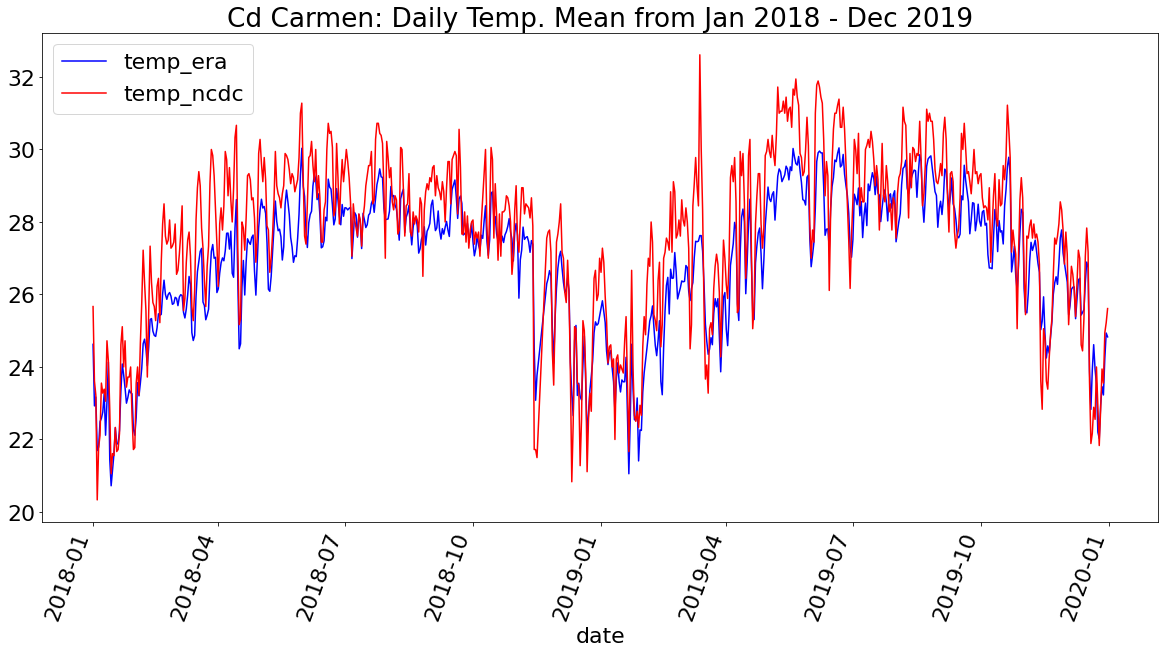

In [22]:
# Get ERA5

data=netCDF4.Dataset("ERA5/ERA5_2018_2019_CdCarmen.nc",mode='r')
temp2 = data.variables['t2m'][:]-273.15
t=data.variables['time']
d=netCDF4.num2date(t[:], t.units, t.calendar)


neb = []
for i in range(0,len(temp2.data)):
    neb.append({'year': d[i].strftime('%Y'),'month': d[i].strftime('%m'), 
                        'day': d[i].strftime('%d'),
                        'hour': d[i].strftime('%H'),
                        'temp_era': temp2.data[i][0][0]})
da=pd.DataFrame(neb)
CdCarmen_era=da.groupby(['year','month', 'day']).mean()
CdCarmen_era

#NCDC

#Cd carmen:
cdcar=pd.read_csv("NCDC/NCDC_CdCarmen.csv")
#Select columns
CdCarmen= cdcar[[' YEARMODA','   TEMP','  ']]
#From Fahrenheit to Celsius
CdCarmen['   TEMP']=((CdCarmen['   TEMP']) - 32) * (5/9)

CdCarmen['col'] = CdCarmen[' YEARMODA'].astype(str)

# make the new columns using string indexing
CdCarmen['year'] = CdCarmen['col'].str[0:4]
CdCarmen['month'] = CdCarmen['col'].str[4:6]
CdCarmen['day'] = CdCarmen['col'].str[6:8]

# get rid of the extra variable (if you want)
CdCarmen.drop('col', axis=1, inplace=True)
CdCarmen.drop(' YEARMODA', axis=1, inplace=True)

print('NCDC mean daily observations', (CdCarmen['  '].mean()))
####################################################################
#Merge ERA5 and NCDC
merged_car = CdCarmen_era.merge(CdCarmen, how='inner', left_on=["year", "month", "day"], right_on=["year", "month", "day"])
merged_car["date"]=pd.to_datetime((merged_car.year+merged_car.month+merged_car.day),format='%Y%m%d')
merged_car=merged_car.set_index('date')
column_1 = merged_car["temp_era"]
column_2 = merged_car["   TEMP"]
correlation = column_1.corr(column_2)

print(linregress(column_1, column_2))
print(scipy.stats.pearsonr(column_1, column_2))

print('NCDC # observations', len(CdCarmen["   TEMP"]))
print('ERA5 # observations', len(CdCarmen_era["temp_era"]))

print('range era5', merged_car['temp_era'].max()-merged_car['temp_era'].min())
print('range ncdc', merged_car['   TEMP'].max()-merged_car['   TEMP'].min())

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
merged_car['temp_era'].plot(c='blue')
merged_car['   TEMP'].plot(c='red',)
plt.title('Cd Carmen: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)

plt.legend(['temp_era',"temp_ncdc"])

# Plots

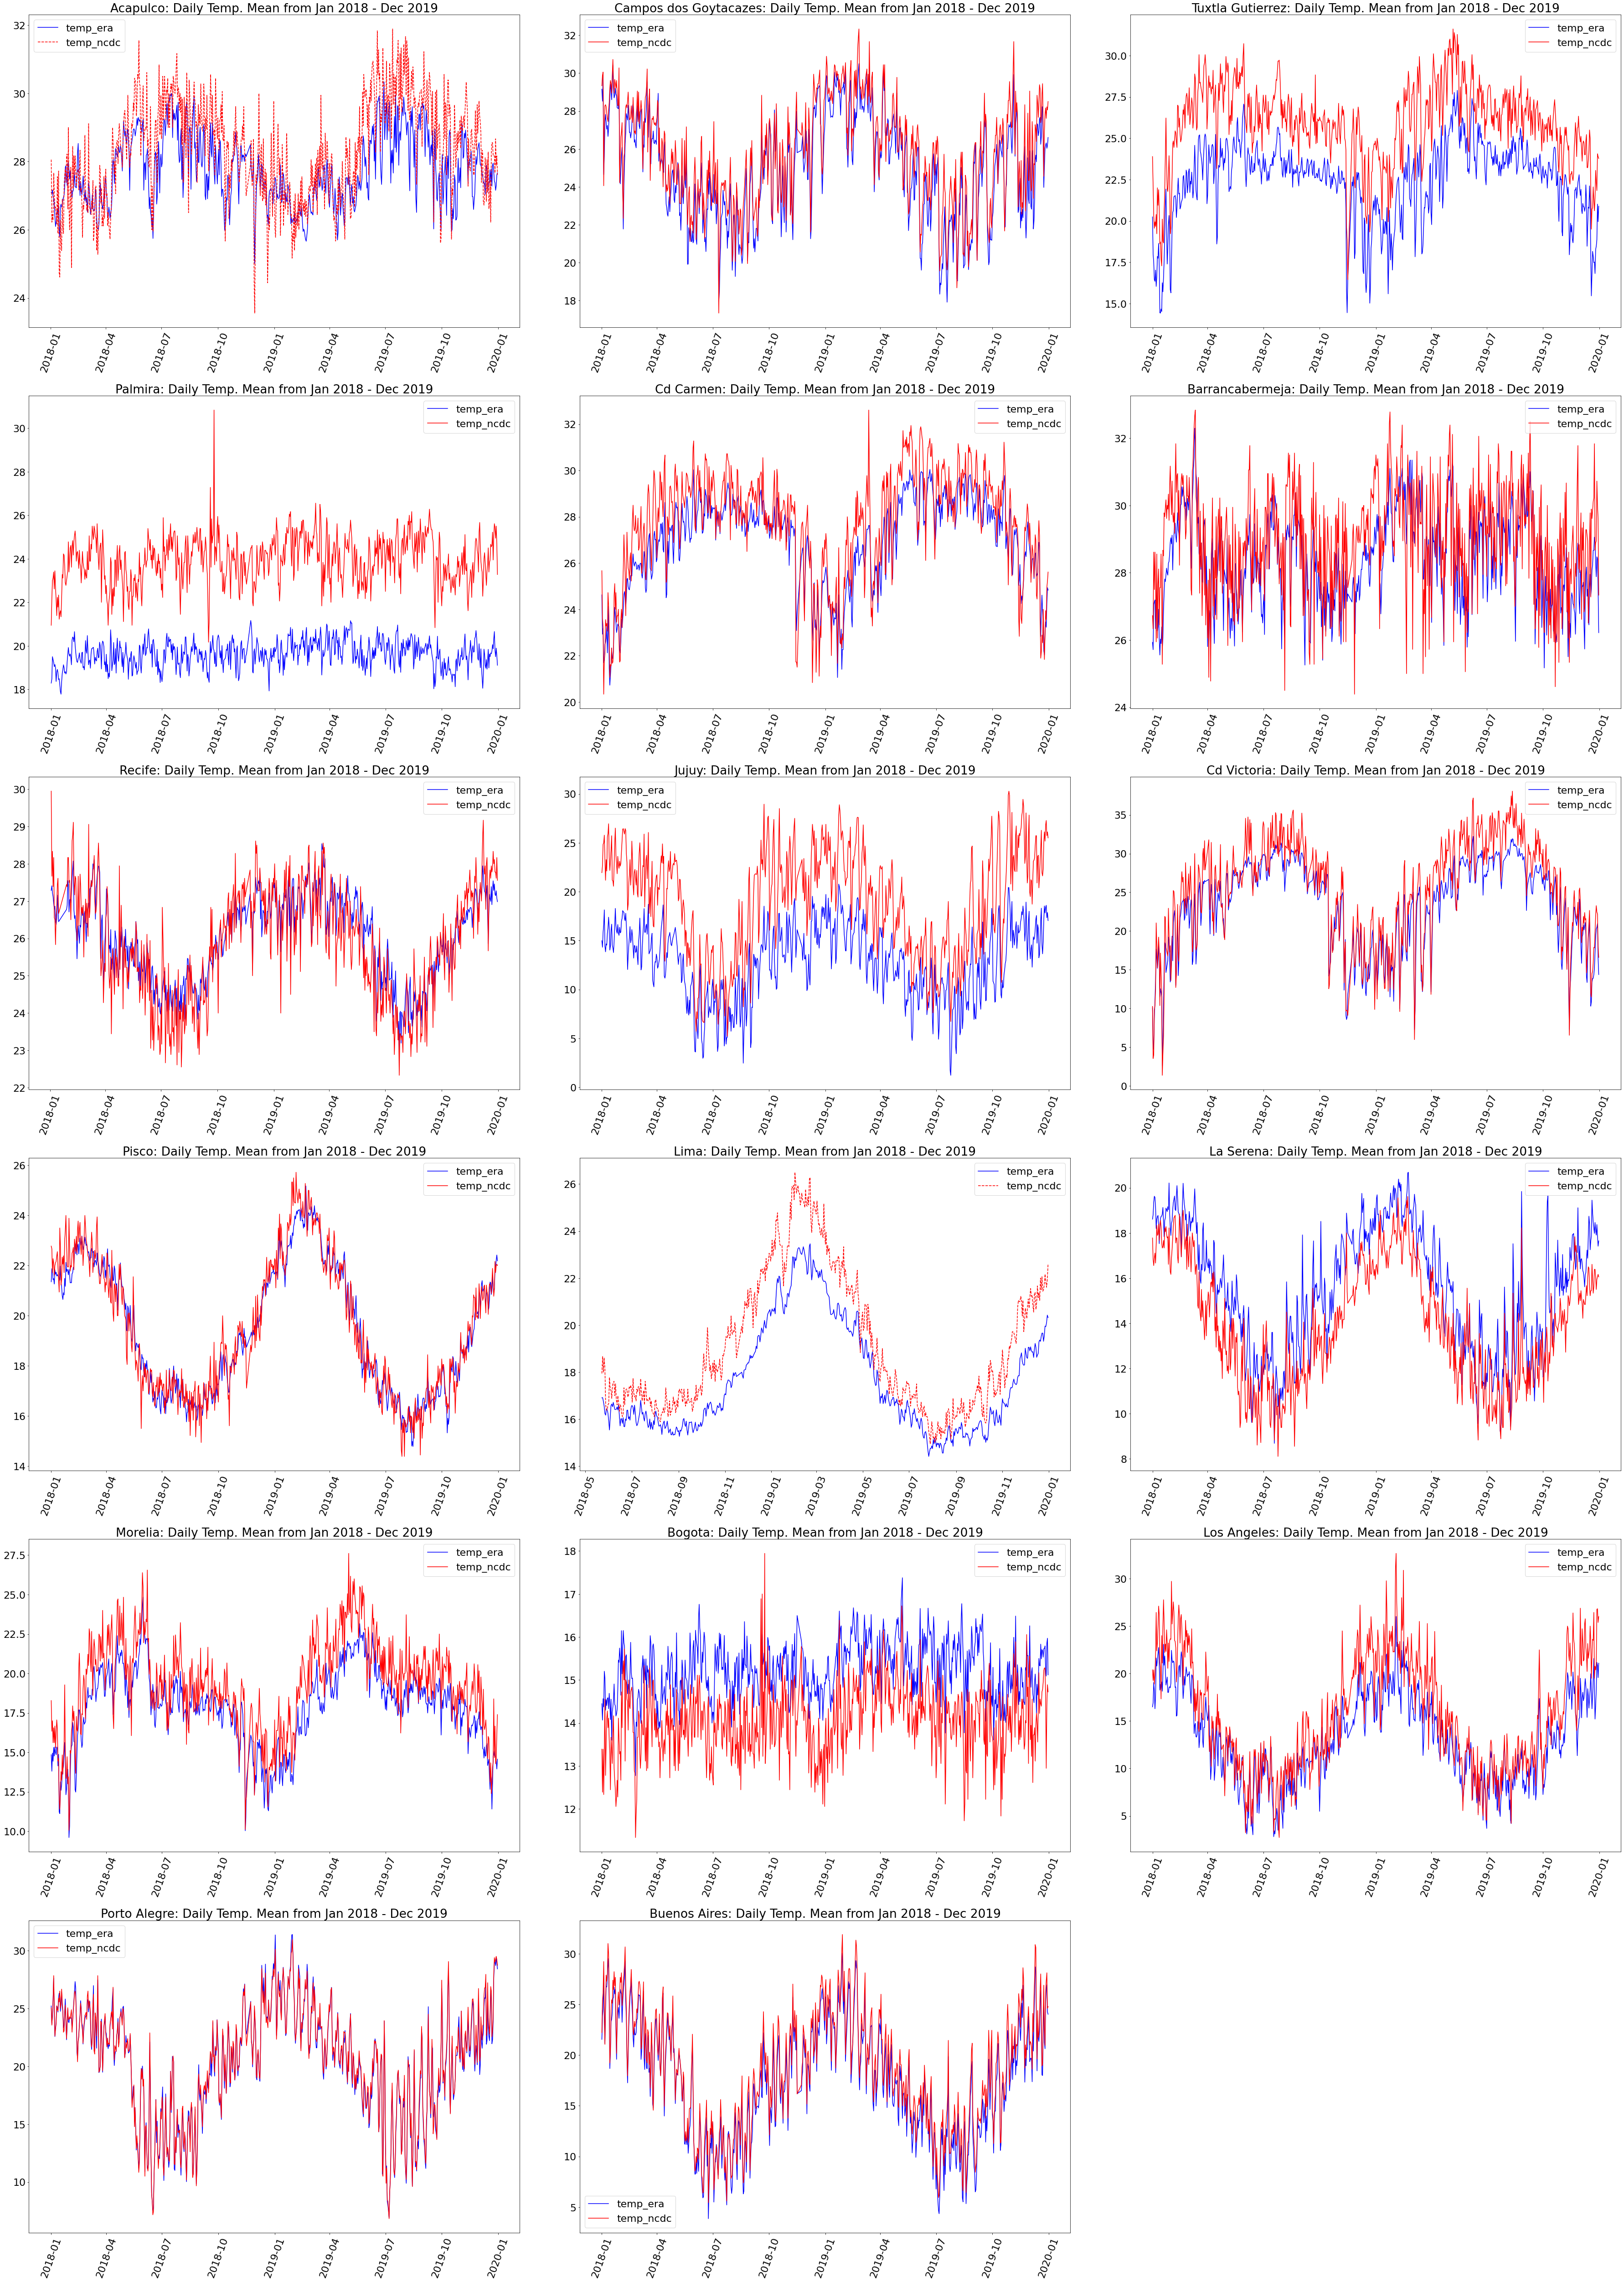

In [28]:
#------------------------------------------------------------------------------
# Figure 2 with 6 plots
#------------------------------------------------------------------------------

f2 = plt.figure(figsize=(50,70))
# plot one
ax10 = f2.add_subplot(6,3,1)
ax10.plot(merged_aca[["temp_era"]], label = 'Curve 1', color = "blue")
ax10.plot(merged_aca[["TEMP"]], label = 'Curve 7', color="red", linestyle ='--')
plt.title('Acapulco: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])
# dashed line


# plot two
ax20 = f2.add_subplot(6,3,2)
ax20.plot(merged_cam[["temp_era"]], label = 'Curve 2', color = "blue")
ax20.plot(merged_cam[["   TEMP"]], label = 'Curve 8', color = "red")
plt.title('Campos dos Goytacazes: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot three
ax30 = f2.add_subplot(6,3,3)
ax30.plot(merged_tux[["temp_era"]], label = 'Curve 3', color = "blue")
ax30.plot(merged_tux[["TEMP"]], label = 'Curve 9', color = "red")
plt.title('Tuxtla Gutierrez: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot four
ax40 = f2.add_subplot(6,3,4)
ax40.plot(merged_pal[["temp_era"]], label = 'Curve 4', color = "blue")
ax40.plot(merged_pal[["TEMP"]], label = 'Curve 10', color = "red")
plt.title('Palmira: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot five
ax50 = f2.add_subplot(6,3,5)
ax50.plot(merged_car[["temp_era"]], label = 'Curve 5', color = "blue")
ax50.plot(merged_car[["   TEMP"]], label = 'Curve 11', color = "red")
plt.title('Cd Carmen: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])
# added line marker circle


# plot six
ax60 = f2.add_subplot(6,3,6)
ax60.plot(merged_bar[["temp_era"]], label = 'Curve 6', color = "blue")
ax60.plot(merged_bar[["TEMP"]], label = 'Curve 12', color = "red")
plt.title('Barrancabermeja: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot seven
ax70 = f2.add_subplot(6,3,7)
ax70.plot(merged_rec[["temp_era"]], label = 'Curve 7', color = "blue")
ax70.plot(merged_rec[["   TEMP"]], label = 'Curve 13', color = "red")
plt.title('Recife: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot eight
ax80 = f2.add_subplot(6,3,8)
ax80.plot(merged_juy[["temp_era"]], label = 'Curve 8', color = "blue")
ax80.plot(merged_juy[["TEMP"]], label = 'Curve 14', color = "red")
plt.title('Jujuy: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot nine
ax90 = f2.add_subplot(6,3,9)
ax90.plot(merged_vic[["temp_era"]], label = 'Curve 9', color = "blue")
ax90.plot(merged_vic[["TEMP"]], label = 'Curve 15', color = "red")
plt.title('Cd Victoria: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot ten
ax100 = f2.add_subplot(6,3,10)
ax100.plot(merged_pis[["temp_era"]], label = 'Curve 10', color = "blue")
ax100.plot(merged_pis[["TEMP"]], label = 'Curve 15', color = "red")
plt.title('Pisco: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot eleven
ax110 = f2.add_subplot(6,3,11)
ax110.plot(merged_lim[["temp_era"]], label = 'Curve 11', color = "blue")
ax110.plot(merged_lim[["   TEMP"]], label = 'Curve 7', color="red", linestyle ='--')
plt.title('Lima: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot twelve
ax120 = f2.add_subplot(6,3,12)
ax120.plot(merged_las[["temp_era"]], label = 'Curve 12', color = "blue")
ax120.plot(merged_las[["   TEMP"]], label = 'Curve 8', color = "red")
plt.title('La Serena: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])


# plot thirteen
ax130 = f2.add_subplot(6,3,13)
ax130.plot(merged_mor[["temp_era"]], label = 'Curve 13', color = "blue")
ax130.plot(merged_mor[["TEMP"]], label = 'Curve 9', color = "red")
plt.title('Morelia: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])


# plot fourteen
ax140 = f2.add_subplot(6,3,14)
ax140.plot(merged_bog[["temp_era"]], label = 'Curve 4', color = "blue")
ax140.plot(merged_bog[["TEMP"]], label = 'Curve 10', color = "red")
plt.title('Bogota: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])


# plot fifteen
ax150 = f2.add_subplot(6,3,15)
ax150.plot(merged_la[["temp_era"]], label = 'Curve 15', color = "blue")
ax150.plot(merged_la[["TEMP"]], label = 'Curve 11', color = "red")
plt.title('Los Angeles: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot sixteen
ax160 = f2.add_subplot(6,3,16)
ax160.plot(merged_pa[["temp_era"]], label = 'Curve 16', color = "blue")
ax160.plot(merged_pa[["   TEMP"]], label = 'Curve 12', color = "red")
plt.title('Porto Alegre: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot seventeen
ax170 = f2.add_subplot(6,3,17)
ax170.plot(merged_ba[["temp_era"]], label = 'Curve 17', color = "blue")
ax170.plot(merged_ba[["   TEMP"]], label = 'Curve 13', color = "red")
plt.title('Buenos Aires: Daily Temp. Mean from Jan 2018 - Dec 2019')
plt.xticks(rotation=70)
plt.legend(['temp_era',"temp_ncdc"])

# plot eighteen
#ax180 = f2.add_subplot(6,3,18)
#ax180.plot(merged_sra[["temp_era"]], label = 'Curve 18', color = "blue")
#ax180.plot(merged_sra[["   TEMP"]], label = 'Curve 14', color = "red")
#plt.title('Santa Rosa: Daily Temp. Mean from Jan 2018 - Dec 2019')
#plt.xticks(rotation=70)
#plt.legend(['temp_era',"temp_ncdc"])

plt.tight_layout()
plt.savefig('../output/val_plots.pdf')
plt.show()
